**Adapt ready Task**

1. Data set reference link: https://www.consumerfinance.gov/data-
research/consumer-complaints/#download-the-data
File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Problem statement:
Download the data from the file data source and provide possible data insights.

In [1]:
import requests
import zipfile
import io
import pandas as pd

# Step 1: Download the ZIP file
url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Step 2: Extract the CSV file
csv_filename = zip_file.namelist()[0]
zip_file.extract(csv_filename)

# Step 3: Load the data into a pandas DataFrame
df = pd.read_csv(csv_filename)

<ipython-input-1-094afc5c4a29>:16: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filename)


In [2]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",MI,48228,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025658
1,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30315,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025656
2,2024-05-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,FL,33139,NaN,NaN,Web,2024-05-04,In progress,Yes,NaN,8924799
3,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30144,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025651
4,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CT,06040,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025643


In [3]:
df.shape

(5251126, 18)

In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 3
Sub-issue                        736321
Consumer complaint narrative    3411704
Company public response         2733501
Company                               0
State                             45801
ZIP code                          30225
Tags                            4764840
Consumer consent provided?      1042778
Submitted via                         0
Date sent to company                  0
Company response to consumer         15
Timely response?                      0
Consumer disputed?              4482810
Complaint ID                          0
dtype: int64

In [7]:
df['Sub-product'].fillna(df['Sub-product'].mode()[0], inplace=True)

# Issue: Fill with mode
df['Issue'].fillna(df['Issue'].mode()[0], inplace=True)

# Sub-issue: Consider dropping due to high number of missing values
df.drop(columns=['Sub-issue'], inplace=True)

# Consumer complaint narrative: Fill with placeholder or leave as missing
df['Consumer complaint narrative'].fillna("No narrative provided", inplace=True)

# Company public response: Fill with placeholder or leave as missing
df['Company public response'].fillna("No response", inplace=True)

# State: Fill with mode
df['State'].fillna(df['State'].mode()[0], inplace=True)

# ZIP code: Fill with median or mode
df['ZIP code'].fillna(df['ZIP code'].mode()[0], inplace=True)

# Tags: Consider dropping due to high number of missing values
df.drop(columns=['Tags'], inplace=True)

# Consumer consent provided?: Fill with placeholder or leave as missing
df['Consumer consent provided?'].fillna("Unknown", inplace=True)

# Company response to consumer: Fill with mode
df['Company response to consumer'].fillna(df['Company response to consumer'].mode()[0], inplace=True)

# Consumer disputed?: Fill with placeholder or leave as missing
df['Consumer disputed?'].fillna("Unknown", inplace=True)

In [8]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

In [9]:
# Number of complaints
num_complaints = len(df)
print(f"Total number of complaints: {num_complaints}")
print("\n")

# Most common issues
common_issues = df['Issue'].value_counts().head(10)
print("Most common issues:")
print(common_issues)
print("\n")

# Companies receiving the most complaints
companies_most_complaints = df['Company'].value_counts().head(10)
print("Companies receiving the most complaints:")
print(companies_most_complaints)
print("\n")

# Most common products
common_products = df['Product'].value_counts().head(10)
print("Most common products:")
print(common_products)
print("\n")

# Complaints over time
df['Date received'] = pd.to_datetime(df['Date received'])
complaints_over_time = df['Date received'].dt.year.value_counts().sort_index()
print("Complaints over time (by year):")
print(complaints_over_time)
print("\n")

# Response from companies
response_from_companies = df['Company response to consumer'].value_counts()
print("Responses from companies:")
print(response_from_companies)

Total number of complaints: 5251126


Most common issues:
Issue
Incorrect information on your report                                                1538012
Improper use of your report                                                          822314
Problem with a credit reporting company's investigation into an existing problem     589336
Problem with a company's investigation into an existing problem                      220046
Attempts to collect debt not owed                                                    214001
Managing an account                                                                  130203
Loan modification,collection,foreclosure                                             112306
Incorrect information on credit report                                               102684
Written notification about debt                                                       98570
Trouble during payment process                                                        81521
Name: count, dty

In [13]:
import matplotlib.pyplot as plt

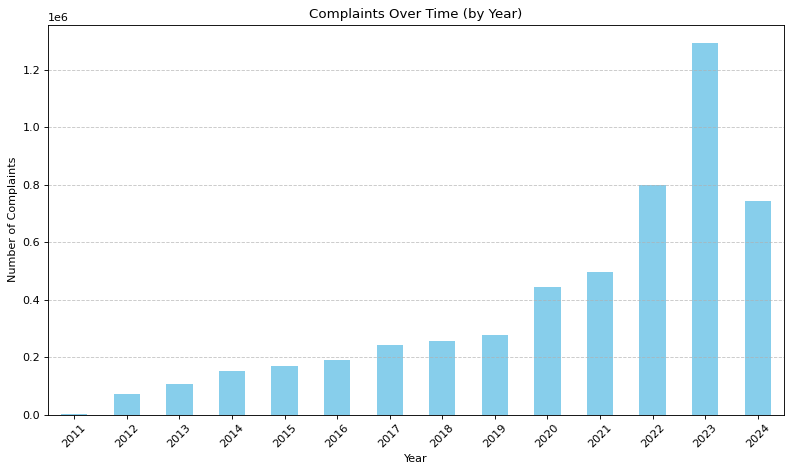

In [14]:
# Set up Matplotlib parameters for better visualization
plt.rcParams.update({'figure.figsize': (10, 6), 'figure.dpi': 80})

# Visualize the distribution of complaints over time (by year)
plt.figure(figsize=(10, 6))
df['Date received'] = pd.to_datetime(df['Date received'])
df['Year'] = df['Date received'].dt.year
complaints_over_time = df['Year'].value_counts().sort_index()
complaints_over_time.plot(kind='bar', color='skyblue')
plt.title('Complaints Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

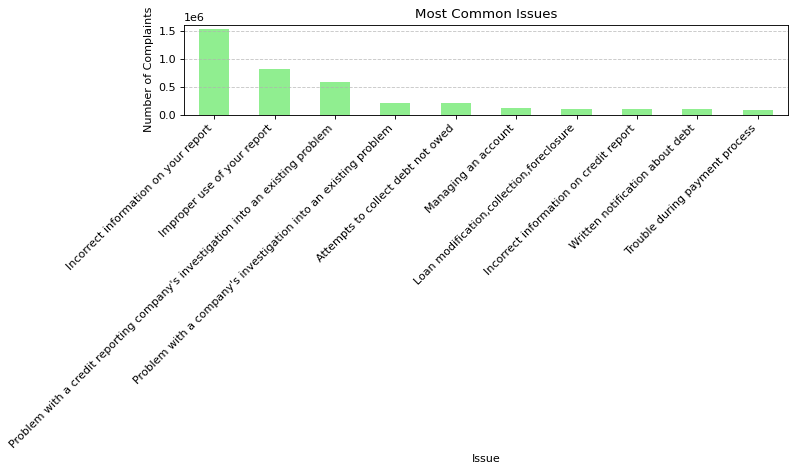

In [15]:
# Visualize the most common issues
plt.figure(figsize=(10, 6))
common_issues = df['Issue'].value_counts().head(10)
common_issues.plot(kind='bar', color='lightgreen')
plt.title('Most Common Issues')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

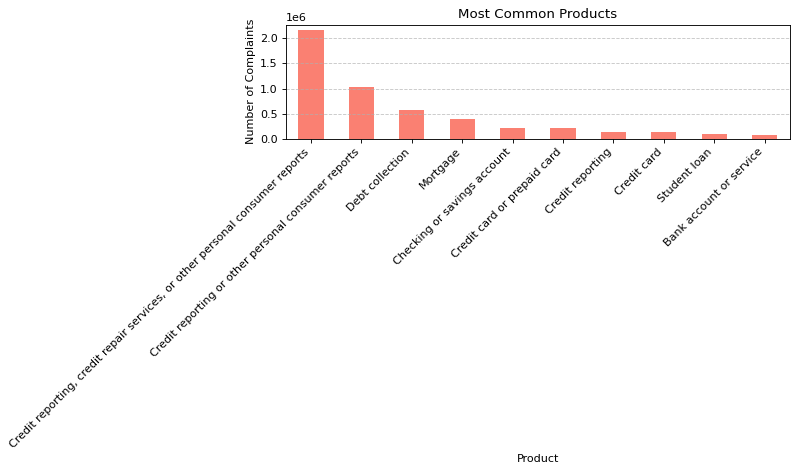

In [16]:
# Visualize the most common products
plt.figure(figsize=(10, 6))
common_products = df['Product'].value_counts().head(10)
common_products.plot(kind='bar', color='salmon')
plt.title('Most Common Products')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


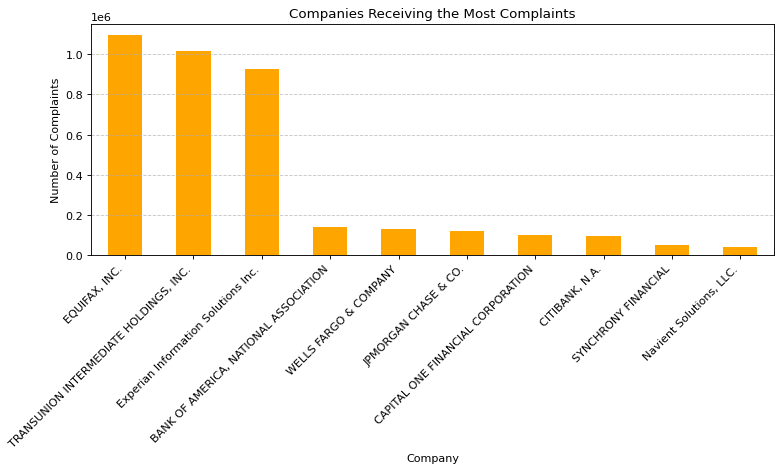

In [17]:
# Visualize the companies receiving the most complaints
plt.figure(figsize=(10, 6))
companies_most_complaints = df['Company'].value_counts().head(10)
companies_most_complaints.plot(kind='bar', color='orange')
plt.title('Companies Receiving the Most Complaints')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

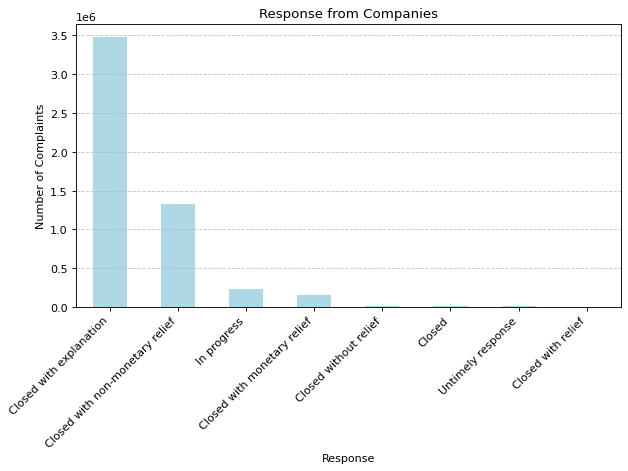

In [18]:
# Visualize the response from companies
plt.figure(figsize=(8, 6))
response_from_companies = df['Company response to consumer'].value_counts()
response_from_companies.plot(kind='bar', color='lightblue')
plt.title('Response from Companies')
plt.xlabel('Response')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**The visualizations presented in this report provide valuable insights into consumer complaints data obtained from the Consumer Financial Protection Bureau (CFPB).**

Key findings include:

*   A notable increase in complaints was observed in the year 2023 compared to previous years, indicating potential shifts in consumer behavior or industry trends.

*   The most common issues reported by consumers are related to credit reporting, credit repair services, or other personal consumer reports, highlighting areas of concern within the financial industry.

*   Similarly, credit reporting, credit repair services, or other personal consumer reports are the most complained-about products, suggesting persistent challenges in this area.

*   Equifax, Inc. emerged as the company receiving the highest number of complaints, followed by TransUnion Intermediate Holdings, Inc., indicating potential areas for improvement or regulatory scrutiny.

*   The most common response from companies to consumer complaints is closing complaints with an explanation, indicating efforts to address consumer concerns and provide transparency.

These insights can inform regulatory actions, consumer education efforts, and industry practices aimed at improving consumer protection and fostering a more transparent and responsive financial industry.

2. Given an unsorted array of integers, find the length of the longest continuous
increasing subsequence (subarray).
Example 1:
Input: [1,3,5,4,7]
Output: 3
Example 2:
Input: [2,2,2,2,2]
Output: 1

In [10]:
def find_length_of_seq(nums):
    if not nums:
        return 0

    max_length = 1
    current_length = 1

    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
        else:
            max_length = max(max_length, current_length)
            current_length = 1

    max_length = max(max_length, current_length)

    return max_length

print(find_length_of_seq([1, 3, 5, 4, 7]))
print(find_length_of_seq([2, 2, 2, 2, 2]))

3
1


3. Given a list of non negative integers, arrange them such that they form the largest
number.

 Example 1:
 Input: [10,2]
 Output: &quot;210&quot;
 Example 2:

 Input: [3,30,34,5,9]
 Output: &quot;9534330&quot;

In [11]:
from functools import cmp_to_key

nums = [3, 30, 34, 5, 9]

# Custom comparator function
def compare(x, y):
    if x + y > y + x:
        return -1
    elif x + y < y + x:
        return 1
    else:
        return 0

# Convert numbers to strings
str_nums = list(map(str, nums))

# Sort the strings using the custom comparator
sorted_nums = sorted(str_nums, key=cmp_to_key(compare))

# Join the sorted strings to form the largest number
largest_number = ''.join(sorted_nums)

# Handle the case where the largest number is zero (e.g., [0, 0])
if largest_number[0] == '0':
    largest_number = '0'

print(largest_number)


9534330


4. Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached
sample_json.json file using Python.

In [12]:
import json
import pandas as pd

# Sample JSON data (stored in a string for demonstration purposes)
json_data = '''{
    "web-app": {
        "servlet": [
            {
                "servlet-name": "cofaxCDS",
                "servlet-class": "org.cofax.cds.CDSServlet",
                "init-param": {
                    "configGlossary:installationAt": "Philadelphia, PA",
                    "configGlossary:adminEmail": "ksm@pobox.com",
                    "configGlossary:poweredBy": "Cofax",
                    "configGlossary:poweredByIcon": "/images/cofax.gif",
                    "configGlossary:staticPath": "/content/static",
                    "templateProcessorClass": "org.cofax.WysiwygTemplate",
                    "templateLoaderClass": "org.cofax.FilesTemplateLoader",
                    "templatePath": "templates",
                    "templateOverridePath": "",
                    "defaultListTemplate": "listTemplate.htm",
                    "defaultFileTemplate": "articleTemplate.htm",
                    "useJSP": "false",
                    "jspListTemplate": "listTemplate.jsp",
                    "jspFileTemplate": "articleTemplate.jsp",
                    "cachePackageTagsTrack": 200,
                    "cachePackageTagsStore": 200,
                    "cachePackageTagsRefresh": 60,
                    "cacheTemplatesTrack": 100,
                    "cacheTemplatesStore": 50,
                    "cacheTemplatesRefresh": 15,
                    "cachePagesTrack": 200,
                    "cachePagesStore": 100,
                    "cachePagesRefresh": 10,
                    "cachePagesDirtyRead": 10,
                    "searchEngineListTemplate": "forSearchEnginesList.htm",
                    "searchEngineFileTemplate": "forSearchEngines.htm",
                    "searchEngineRobotsDb": "WEB-INF/robots.db",
                    "useDataStore": "true",
                    "dataStoreClass": "org.cofax.SqlDataStore",
                    "redirectionClass": "org.cofax.SqlRedirection",
                    "dataStoreName": "cofax",
                    "dataStoreDriver": "com.microsoft.jdbc.sqlserver.SQLServerDriver",
                    "dataStoreUrl": "jdbc:microsoft:sqlserver://LOCALHOST:1433;DatabaseName=goon",
                    "dataStoreUser": "sa",
                    "dataStorePassword": "dataStoreTestQuery",
                    "dataStoreTestQuery": "SET NOCOUNT ON;select test='test';",
                    "dataStoreLogFile": "/usr/local/tomcat/logs/datastore.log",
                    "dataStoreInitConns": 10,
                    "dataStoreMaxConns": 100,
                    "dataStoreConnUsageLimit": 100,
                    "dataStoreLogLevel": "debug",
                    "maxUrlLength": 500
                }
            },
            {
                "servlet-name": "cofaxEmail",
                "servlet-class": "org.cofax.cds.EmailServlet",
                "init-param": {
                    "mailHost": "mail1",
                    "mailHostOverride": "mail2"
                }
            },
            {
                "servlet-name": "cofaxAdmin",
                "servlet-class": "org.cofax.cds.AdminServlet"
            },
            {
                "servlet-name": "fileServlet",
                "servlet-class": "org.cofax.cds.FileServlet"
            },
            {
                "servlet-name": "cofaxTools",
                "servlet-class": "org.cofax.cms.CofaxToolsServlet",
                "init-param": {
                    "templatePath": "toolstemplates/",
                    "log": 1,
                    "logLocation": "/usr/local/tomcat/logs/CofaxTools.log",
                    "logMaxSize": "",
                    "dataLog": 1,
                    "dataLogLocation": "/usr/local/tomcat/logs/dataLog.log",
                    "dataLogMaxSize": "",
                    "removePageCache": "/content/admin/remove?cache=pages&id=",
                    "removeTemplateCache": "/content/admin/remove?cache=templates&id=",
                    "fileTransferFolder": "/usr/local/tomcat/webapps/content/fileTransferFolder",
                    "lookInContext": 1,
                    "adminGroupID": 4,
                    "betaServer": "true"
                }
            }
        ],
        "servlet-mapping": {
            "cofaxCDS": "/",
            "cofaxEmail": "/cofaxutil/aemail/*",
            "cofaxAdmin": "/admin/*",
            "fileServlet": "/static/*",
            "cofaxTools": "/tools/*"
        },
        "taglib": {
            "taglib-uri": "cofax.tld",
            "taglib-location": "/WEB-INF/tlds/cofax.tld"
        }
    }
}'''

# Parse the JSON data
data = json.loads(json_data)

# Extract servlet information
servlets = data["web-app"]["servlet"]

# Prepare data for DataFrame
servlet_list = []
for servlet in servlets:
    servlet_list.append({
        "servlet-name": servlet["servlet-name"],
        "servlet-class": servlet["servlet-class"]
    })

# Create a DataFrame
df_servlet = pd.DataFrame(servlet_list)

# Write DataFrame to a CSV file
csv_filename = "servlets.csv"
df_servlet.to_csv(csv_filename, index=False)

df_servlet

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet
